
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

Classification. Here we have to predict whether a student pass or fail. It is categorical. So we use classification algorithms. 

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
# Read student data
data=pd.read_csv('student-data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [3]:
data.shape

(395, 31)

In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [5]:
# Calculate number of students
n_students = data.shape[0]

In [6]:
# Calculate number of features
n_features = data.shape[1]

In [7]:
data['passed'].value_counts()

yes    265
no     130
Name: passed, dtype: int64

In [8]:
# Calculate passing students
n_passed = data['passed'].value_counts()[0]

In [9]:
# Calculate failing students
n_failed = data['passed'].value_counts()[1]

In [10]:
# Calculate graduation rate
grad_rate = data['passed'].value_counts(normalize=True)*100

In [11]:
# Print the results

print('1. The total number of students : ', n_students)
print('2. The total number of features for each student : ', n_features)
print('3. The number of those students who passed : ', n_passed)
print('4. The number of those students who failed : ', n_failed)
print('5. The graduation rate of the class, in percent (%) \n Pass Percentage : ',grad_rate[0], '\n Fail Percentage : ',grad_rate[1])

1. The total number of students :  395
2. The total number of features for each student :  31
3. The number of those students who passed :  265
4. The number of those students who failed :  130
5. The graduation rate of the class, in percent (%) 
 Pass Percentage :  67.08860759493672 
 Fail Percentage :  32.91139240506329


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [12]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [13]:
# Extract feature columns

In [13]:
feature_columns = data.drop('passed',axis=1)

In [14]:
# Extract target column 'passed'

In [15]:
target_column = data['passed']

In [17]:
# Separate the data into feature data and target data (X and y, respectively)

In [83]:
X = feature_columns
y = target_column

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [17]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [84]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
label_m=LabelEncoder()
a=['schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']
for i in np.arange(len(a)):
    X[a[i]]=label_m.fit_transform(X[a[i]])


In [85]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,0,0,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,0,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,1,1,0,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,1,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,0,0,4,3,2,1,2,5,4


In [86]:
#one hot encoding
X = pd.get_dummies(X)

In [87]:
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,3,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0


In [22]:
X.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'school_GP', 'school_MS', 'sex_F', 'sex_M',
       'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [88]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 300 ,test_size= 95, random_state = 2)

In [24]:
 X_train.shape

(300, 48)

In [25]:
# Show the results of the split
X_test.shape

(95, 48)

### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

In [ ]:
#explaination 

List three supervised learning models that are appropriate for this problem.

1. Logistic Regression

2. K-Nearest Neighbours

3. Support Vector Machine

What are the general applications of each model? 

1. Logistic Regression

Logistic regression is a predictive modelling algorithm that is used when the Y variable is binary categorical. That is, it can take only two values like 1 or 0. In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function. Using the logistic regression algorithm, banks can predict whether a customer would default on loans or not, Ecommerce companies can identify buyers if they are likely to purchase a certain product, Companies can predict whether they will gain or lose money in the next quarter, year, or month based on their current performance etc.

2. K-Nearest Neighbours

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. Classification is computed from a simple majority vote of the k nearest neighbours of each point. KNN can be used in banking system to predict weather an individual is fit for loan approval, it can be used to find an individual’s credit rating by comparing with the persons having similar traits, using knn we can classify a potential voter into various classes like “Will Vote”, “Will not Vote” etc.

3. Support Vector Machine

Support vector machine is a representation of the training data as points in space separated into categories by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall. There are many applications of SVM. Many of them are under research as well. Text Classification is an automatic process of classification of text into predefined categories. We use SVM to classify Emails into spam or non-spam, news articles into different categories like Politics, stock exchange , Sports, etc. We could use SVM in differentiating between the handwritings of two different people etc.

What are their strengths and weaknesses? 

1. Logistic Regression

Advantages: Logistic regression is designed for this purpose (classification), and is most useful for understanding the influence of several independent variables on a single outcome variable.

Disadvantages: Works only when the predicted variable is binary, assumes all predictors are independent of each other and assumes data is free of missing values.
    
2. K-Nearest Neighbours
    
Advantages: This algorithm is simple to implement, robust to noisy training data, and effective if training data is large.

Disadvantages: Need to determine the value of K and the computation cost is high as it needs to compute the distance of each instance to all the training samples.

3.  Support Vector Machine
    
Advantages: Effective in high dimensional spaces and uses a subset of training points in the decision function so it is also memory efficient.

Disadvantages: The algorithm does not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.


Given what you know about the data, why did you choose these models to be applied?

   Logistic Regression could help use predict whether the student passed or failed. Since Logistic regression predictions are discrete. KNN is used here because it will help to predict a new student will pass or fail depending on the neighbouring students details. In SVM we can predict using support vectors.  


In [26]:
# Import the three supervised learning models from sklearn

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
from sklearn.svm import SVC

# Model-1 : LOGISTIC REGRESSION

In [112]:
# fit model-1  on traning data
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
# predict on the test data 
y_pred1 = lr.predict(X_test)
y_pred1

array(['yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes',
       'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no',
       'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no'], dtype=object)

In [119]:
# calculate the accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy is : ',accuracy_score(y_test,y_pred1))

Accuracy is :  0.7368421052631579


In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)

array([[13, 17],
       [ 8, 57]], dtype=int64)

# MODEL-2 : KNN

In [ ]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

In [115]:
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors = k,metric='minkowski')
    Classifier.fit(X_train,y_train)
    y_pred = Classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [116]:
acc_values

[0.6421052631578947,
 0.6105263157894737,
 0.7368421052631579,
 0.7052631578947368,
 0.7578947368421053,
 0.7157894736842105,
 0.7263157894736842,
 0.7368421052631579,
 0.7578947368421053,
 0.7684210526315789,
 0.7263157894736842,
 0.7263157894736842]

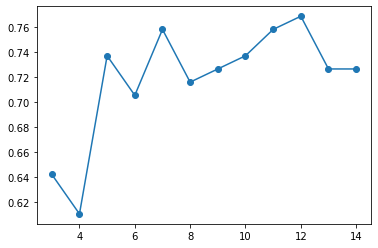

In [117]:
import matplotlib.pyplot as plt
plt.plot(neighbors,acc_values,'o-')

In [125]:
Classifier = KNeighborsClassifier(n_neighbors = 12,metric='minkowski')
Classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [126]:
y_pred2 = Classifier.predict(X_test)
y_pred2

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no',
       'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'],
      dtype=object)

In [137]:
print('Accuracy is : ',accuracy_score(y_test, y_pred2))

Accuracy is :  0.7684210526315789


In [140]:
confusion_matrix(y_test,y_pred2)

array([[11, 19],
       [ 3, 62]], dtype=int64)

# MODEL-3 : SVM

In [141]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

In [124]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [128]:
y_pred3 = svm_linear.predict(X_test)
y_pred3

array(['yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes',
       'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no',
       'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no'], dtype=object)

In [138]:
print('Accuracy is : ',accuracy_score(y_test, y_pred3))

Accuracy is :  0.7263157894736842


In [139]:
confusion_matrix(y_test,y_pred3)

array([[13, 17],
       [ 9, 56]], dtype=int64)

RESULT

These three models have more accuracy than Random Forest and Decision Tree. So it is better to choose these 3 models to predict whether a student pass or fail. Among the three models we choosed here, KNN have highest accuracy score compared to others. Number of misclassifications is less for KNN compared to others. So KNN can used to predict whether a student pass or fail which will give a better result.

# Activity submitted by



1.SRUTHY B S

2.GOKUL M S

3.ROSHAN K RAJU

4.NEERAJA RAVI

